# Gradient Descent

$X \sim \mathcal{U}(0,1)$ \
$y = 2 + 9X + \epsilon$ \
$\epsilon = \mathcal{N}(0, 1)$


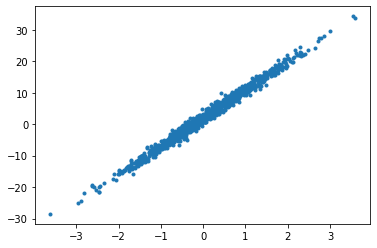

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

samples = 1000
X = np.random.randn(samples, 1)
noise = np.random.randn(samples, 1)
y = 2 + 9 * X + noise
plt.plot(X, y, ".")

In [20]:
X = np.c_[np.ones(samples), X] #c_ concatenates 
X[:5]


array([[ 1.        , -0.65288367],
       [ 1.        , -0.08031196],
       [ 1.        , -0.817945  ],
       [ 1.        , -0.50487884],
       [ 1.        , -1.30306983]])

### Train|test split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((670, 2), (330, 2), (670, 1), (330, 1))

In [38]:
def gradient_descent(X, y, learning_rate = .1, epochs=100):
    m = len(X)

    theta = np.random.randn(X.shape[1], 1) #Picks out the second part of the shape

    for _ in range(epochs): #Batch gradient descent
        gradient = 2 / m * X.T @ (X @ theta - y)
        theta -= learning_rate * gradient

    return theta

theta = gradient_descent(X_train, y_train)
theta #close to 2 and 9 (as created above)
theta.reshape(-1)

array([2.06612651, 8.94454338])

In [39]:
#Show how to pick up the shape dimensions
X_train.shape[1]

2

In [41]:
epochs = range(1, 200) #All numbers between 1 and 200 in an array
thetas = np.array([gradient_descent(X_train, y_train, epochs = epoch).reshape(-1) for epoch in epochs])
thetas.shape

(199, 2)

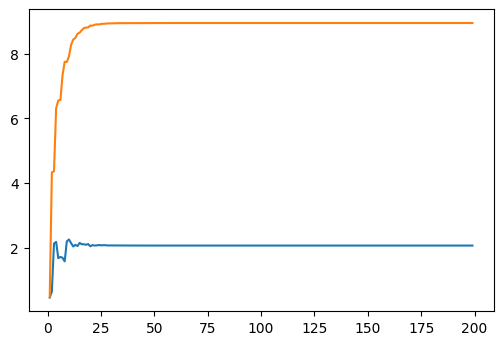

In [42]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(epochs, thetas)

### Stochastic Gradient Descent (SGD)

In [43]:
epochs = 10
t0, t1 = 5, 50 #Learning schedule parameters. Scales the learning rate (we do not want it to take the same steps every time, it should take smaller steps at the end)

def learning_rate_schedule(t):
    """Decrease learning rate as training progresses"""
    return t0/(t+t1) #It will be a smaller number as t increases

theta = np.random.rand(2, 1)
m = len(X_train)

for epoch in range(epochs):
    for i in range(m): #As many samples as the length
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1] #We pick out a random sample
        y_i = y_train[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i) #Same as the equation above gradient = 2 / m * X.T @ (X @ theta - y)
        eta = learning_rate_schedule(epoch * m + i)
        theta -= eta * gradients

theta #Already for 10 epochs we have a good estimate


array([[2.08070097],
       [8.90591459]])